W0000 00:00:1737721556.566183   29595 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
I0000 00:00:1737721557.440130   15915 service.cc:148] XLA service 0x1491c800e6e0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737721557.440232   15915 service.cc:156]   StreamExecutor device (0): Host, Default Version
2025-01-24 17:55:57.459666: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737721557.690291   15915 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 347ms/step

Test Results:
Mean Absolute Error: 0.6974
Mean Squared Error: 1.1632
Accuracy (within ±0.5): 52.20%
Accuracy (within ±1.0): 81.20%
Accuracy (within ±2.0): 95.70%


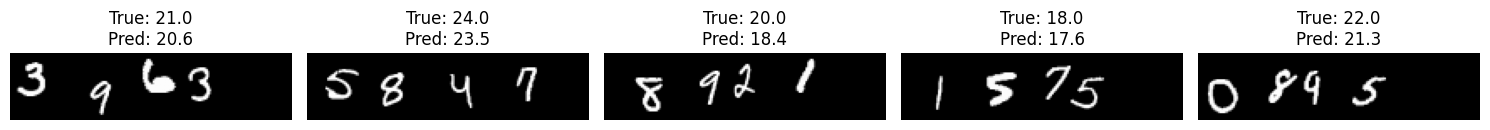

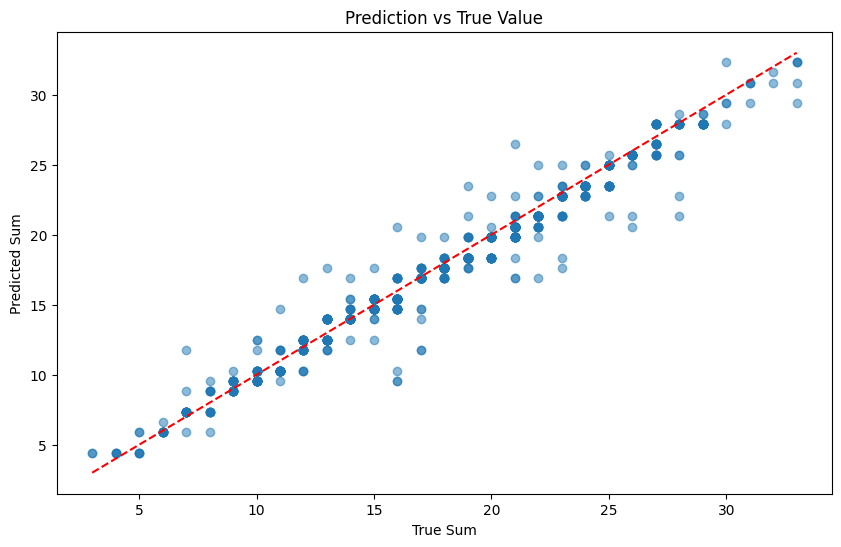

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt

def predict_values(model, X, bins):
    """
    Convert model's categorical predictions back to original continuous scale.
    
    Args:
        model (tf.keras.Model): Trained model
        X (numpy.ndarray): Input images to predict
        bins (numpy.ndarray): Bin boundaries used during training
    
    Returns:
        numpy.ndarray: Predicted values in original continuous scale
    """
    predictions = model.predict(X)
    predicted_bins = np.argmax(predictions, axis=1)
    return bins[predicted_bins]

def calculate_accuracy(y_true, y_pred, threshold):
    """
    Calculate percentage of predictions within a specified threshold of true values.
    
    Args:
        y_true (numpy.ndarray): True values
        y_pred (numpy.ndarray): Predicted values
        threshold (float): Maximum allowed difference between true and predicted values
    
    Returns:
        float: Percentage of predictions within threshold
    """
    return np.mean(np.abs(y_true - y_pred) <= threshold) * 100

def visualize_predictions(X_test, y_true, y_pred, num_samples=5):
    """
    Visualize random sample predictions.
    
    Args:
        X_test (numpy.ndarray): Test images
        y_true (numpy.ndarray): True values
        y_pred (numpy.ndarray): Predicted values
        num_samples (int): Number of samples to visualize
    """
    plt.figure(figsize=(15, 5))
    random_indices = np.random.choice(len(X_test), num_samples, replace=False)
    
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X_test[idx].reshape(X_test[idx].shape[0], X_test[idx].shape[1]), cmap='gray')
        plt.title(f'True: {y_true[idx]:.1f}\nPred: {y_pred[idx]:.1f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load test data
test_data = np.load('../Test_data/data9 (1).npy')
test_labels = np.load('../Test_data/label9.npy')

# Preprocess test data
test_data = test_data / 255.0
test_data = test_data.reshape(-1, test_data.shape[1], test_data.shape[2], 1)

# Load bins
bins = np.load('bin_edges.npy')
num_classes = len(bins)

# Load the complete model
model = tf.keras.models.load_model('digit_sum_classification_model.keras')

# Make predictions
y_pred = predict_values(model, test_data, bins)

# Calculate metrics
mse = np.mean((y_pred - test_labels) ** 2)
mae = np.mean(np.abs(y_pred - test_labels))

accuracy_0 = calculate_accuracy(test_labels, y_pred, 0.5)
accuracy_1 = calculate_accuracy(test_labels, y_pred, 1.0)
accuracy_2 = calculate_accuracy(test_labels, y_pred, 2.0)

print(f"\nTest Results:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Accuracy (within ±0.5): {accuracy_0:.2f}%")
print(f"Accuracy (within ±1.0): {accuracy_1:.2f}%")
print(f"Accuracy (within ±2.0): {accuracy_2:.2f}%")

# Visualize predictions
visualize_predictions(test_data, test_labels, y_pred)

# Plot prediction vs true value scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, y_pred, alpha=0.5)
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], 'r--')
plt.xlabel('True Sum')
plt.ylabel('Predicted Sum')
plt.title('Prediction vs True Value')
plt.show()